<a href="https://colab.research.google.com/github/lgroessl/STAT-499-Final-Project/blob/main/Stat_499_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_excel('Mesothelioma data set.xlsx')
df.head()

,age,gender,city,asbestos exposure,type of MM,duration of asbestos exposure,diagnosis method,keep side,cytology,duration of symptoms,...,pleural lactic dehydrogenise,pleural protein,pleural albumin,pleural glucose,dead or not,pleural effusion,pleural thickness on tomography,pleural level of acidity (pH),C-reactive protein (CRP),class of diagnosis
0,47.0,1,0,1,0.0,20.0,1,0,1,24.0,...,289.0,0.0,0.00,79.0,1,0.0,0.0,0.0,34,1
1,55.0,1,0,1,0.0,45.0,1,0,0,1.0,...,7541.0,1.6,0.80,6.0,1,1.0,1.0,1.0,42,1
2,29.0,1,1,1,0.0,23.0,0,1,0,1.0,...,480.0,0.0,0.00,90.0,1,0.0,0.0,0.0,43,2
3,39.0,1,0,1,0.0,10.0,1,0,0,3.0,...,459.0,5.0,2.80,45.0,1,1.0,0.0,0.0,21,1
4,47.0,1,0,1,0.0,10.0,1,1,1,1.5,...,213.0,3.6,1.95,53.0,1,1.0,0.0,0.0,11,1


In [ ]:
df.columns

Index(['age', 'gender', 'city', 'asbestos exposure', 'type of MM',
       'duration of asbestos exposure', 'diagnosis method', 'keep side',
       'cytology', 'duration of symptoms', 'dyspnoea', 'ache on chest',
       'weakness', 'habit of cigarette', 'performance status', 'white blood',
       'cell count (WBC)', 'hemoglobin (HGB)', 'platelet count (PLT)',
       'sedimentation', 'blood lactic dehydrogenise (LDH)',
       'alkaline phosphatise (ALP)', 'total protein', 'albumin', 'glucose',
       'pleural lactic dehydrogenise', 'pleural protein', 'pleural albumin',
       'pleural glucose', 'dead or not', 'pleural effusion',
       'pleural thickness on tomography', 'pleural level of acidity (pH)',
       'C-reactive protein (CRP)', 'class of diagnosis'],
      dtype='object')

In [ ]:
df.shape

(324, 35)

In [ ]:
print("Data Types:", df.dtypes)

Data Types: age                                 float64
gender                                int64
city                                  int64
asbestos exposure                     int64
type of MM                          float64
duration of asbestos exposure       float64
diagnosis method                      int64
keep side                             int64
cytology                              int64
duration of symptoms                float64
dyspnoea                              int64
ache on chest                         int64
weakness                              int64
habit of cigarette                    int64
performance status                    int64
white blood                         float64
cell count (WBC)                      int64
hemoglobin (HGB)                      int64
platelet count (PLT)                float64
sedimentation                       float64
blood lactic dehydrogenise (LDH)    float64
alkaline phosphatise (ALP)          float64
total protein       

In [ ]:
print(f'Missing values in "class of diagnosis":', df["class of diagnosis"].isnull().sum())
#1 is healthy, 2 is mesothelioma

Missing values in "class of diagnosis": 0


In [ ]:
target_variable= df['class of diagnosis']

In [ ]:
numeric_df = df.select_dtypes(include=['number'])
correlation = numeric_df.corr()['class of diagnosis']
print(correlation)

age                                -0.124537
gender                             -0.155042
city                                0.011248
asbestos exposure                   0.079652
type of MM                          0.154297
duration of asbestos exposure       0.097681
diagnosis method                   -1.000000
keep side                           0.097132
cytology                           -0.029523
duration of symptoms                0.096831
dyspnoea                           -0.026596
ache on chest                      -0.050535
weakness                            0.060082
habit of cigarette                 -0.054915
performance status                  0.039591
white blood                        -0.034915
cell count (WBC)                   -0.039706
hemoglobin (HGB)                    0.032939
platelet count (PLT)               -0.085189
sedimentation                       0.021237
blood lactic dehydrogenise (LDH)   -0.011690
alkaline phosphatise (ALP)         -0.028506
total prot

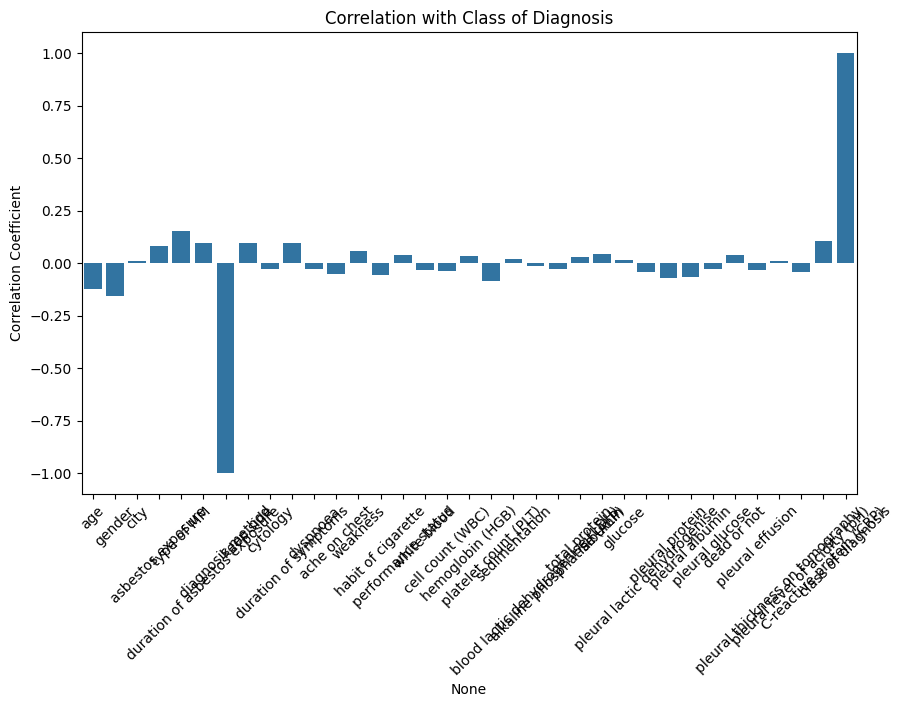

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation.index, y=correlation.values)
plt.xticks(rotation=45)
plt.title('Correlation with Class of Diagnosis')
plt.ylabel('Correlation Coefficient')
plt.show()

In [ ]:
sorted_correlation = correlation.sort_values(ascending=False)

In [ ]:
print(sorted_correlation)

class of diagnosis                  1.000000
type of MM                          0.154297
C-reactive protein (CRP)            0.105727
duration of asbestos exposure       0.097681
keep side                           0.097132
duration of symptoms                0.096831
asbestos exposure                   0.079652
weakness                            0.060082
albumin                             0.043848
performance status                  0.039591
dead or not                         0.039344
hemoglobin (HGB)                    0.032939
total protein                       0.028516
sedimentation                       0.021237
glucose                             0.014009
city                                0.011248
pleural thickness on tomography     0.011222
blood lactic dehydrogenise (LDH)   -0.011690
dyspnoea                           -0.026596
pleural glucose                    -0.027013
alkaline phosphatise (ALP)         -0.028506
cytology                           -0.029523
pleural ef

In [ ]:
df2 = df.drop(columns=['diagnosis method', 'dead or not'])

In [ ]:
#Logistic Regression w/ all variables

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import r2_score
from imblearn.over_sampling import SMOTE

In [ ]:
X = df2.drop(columns=['class of diagnosis'])
y = df2['class of diagnosis']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
#Imbalanced Sample
model = LogisticRegression()
model.fit(X_resampled, y_resampled)
y_pred = model.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[30 16]
 [ 6 13]]

Classification Report:
              precision    recall  f1-score   support

           1       0.83      0.65      0.73        46
           2       0.45      0.68      0.54        19

    accuracy                           0.66        65
   macro avg       0.64      0.67      0.64        65
weighted avg       0.72      0.66      0.68        65



In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[42  4]
 [14  5]]

Classification Report:
              precision    recall  f1-score   support

           1       0.75      0.91      0.82        46
           2       0.56      0.26      0.36        19

    accuracy                           0.72        65
   macro avg       0.65      0.59      0.59        65
weighted avg       0.69      0.72      0.69        65



In [ ]:
#Logistic Regression with only variables that would be preemptive

In [ ]:
df3 = df2[['age', 'gender', 'city', 'asbestos exposure', 'habit of cigarette', 'class of diagnosis']]
x = df3.drop(columns=['class of diagnosis'])
Y = df3['class of diagnosis']

In [ ]:
x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
#Imbalanced Sample
model = LogisticRegression()
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
model.fit(X_resampled, y_resampled)
y_pred = model.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[30 16]
 [ 6 13]]

Classification Report:
              precision    recall  f1-score   support

           1       0.83      0.65      0.73        46
           2       0.45      0.68      0.54        19

    accuracy                           0.66        65
   macro avg       0.64      0.67      0.64        65
weighted avg       0.72      0.66      0.68        65



In [ ]:
model = LogisticRegression()
model.fit(x_train, Y_train)

LogisticRegression()

In [ ]:
Y_pred = model.predict(x_test)

In [ ]:
print("Confusion Matrix:")
print(confusion_matrix(Y_test, Y_pred))

print("\nClassification Report:")
print(classification_report(Y_test, Y_pred))

Confusion Matrix:
[[46  0]
 [18  1]]

Classification Report:
              precision    recall  f1-score   support

           1       0.72      1.00      0.84        46
           2       1.00      0.05      0.10        19

    accuracy                           0.72        65
   macro avg       0.86      0.53      0.47        65
weighted avg       0.80      0.72      0.62        65



In [ ]:
#Random forest with all variables
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
X = df2.drop(columns=['class of diagnosis'])
y = df2['class of diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[46  0]
 [17  2]]

Classification Report:
              precision    recall  f1-score   support

           1       0.73      1.00      0.84        46
           2       1.00      0.11      0.19        19

    accuracy                           0.74        65
   macro avg       0.87      0.55      0.52        65
weighted avg       0.81      0.74      0.65        65



In [ ]:
#WITH SMOTE
X = df2.drop(columns=['class of diagnosis'])
y = df2['class of diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
model = RandomForestClassifier(random_state=42)
model.fit(X_resampled, y_resampled)
y_pred = model.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[42  4]
 [16  3]]

Classification Report:
              precision    recall  f1-score   support

           1       0.72      0.91      0.81        46
           2       0.43      0.16      0.23        19

    accuracy                           0.69        65
   macro avg       0.58      0.54      0.52        65
weighted avg       0.64      0.69      0.64        65



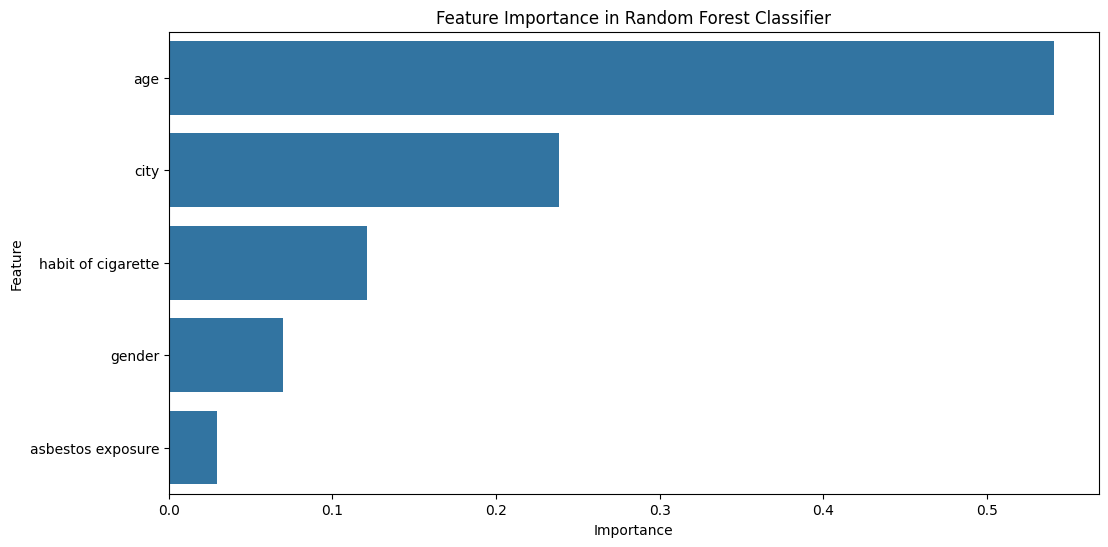

Confusion Matrix:
[[38  8]
 [14  5]]

Classification Report:
              precision    recall  f1-score   support

           1       0.73      0.83      0.78        46
           2       0.38      0.26      0.31        19

    accuracy                           0.66        65
   macro avg       0.56      0.54      0.54        65
weighted avg       0.63      0.66      0.64        65



In [ ]:
#RF without all variables
X = df3.drop(columns=['class of diagnosis'])
y = df3['class of diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance in Random Forest Classifier')
plt.show()
y_pred = model.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

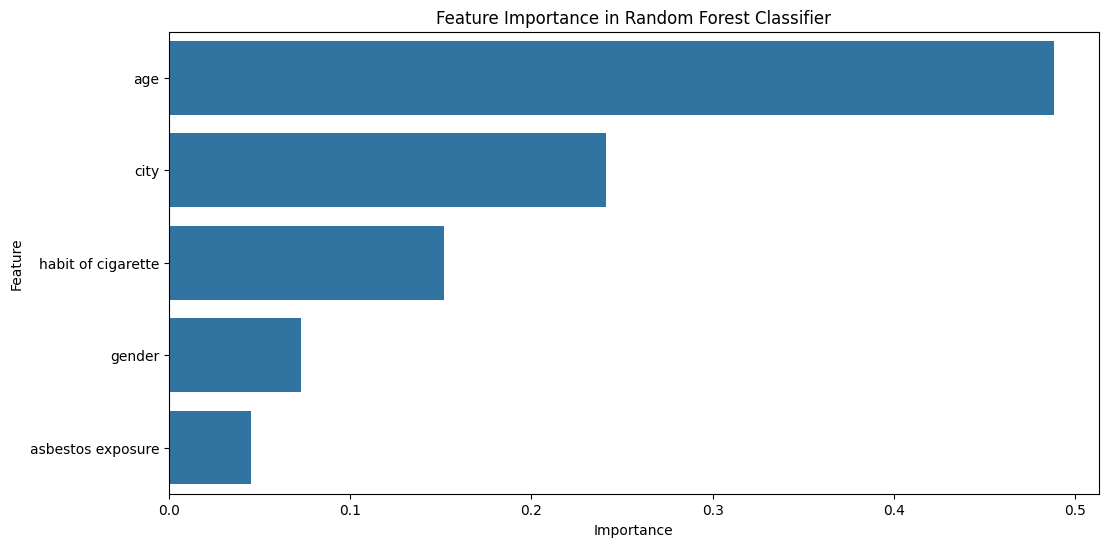

Confusion Matrix:
[[35 11]
 [12  7]]

Classification Report:
              precision    recall  f1-score   support

           1       0.74      0.76      0.75        46
           2       0.39      0.37      0.38        19

    accuracy                           0.65        65
   macro avg       0.57      0.56      0.57        65
weighted avg       0.64      0.65      0.64        65



In [ ]:
#With SMOTE
X = df3.drop(columns=['class of diagnosis'])
y = df3['class of diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model = RandomForestClassifier(random_state=42)
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
model.fit(X_resampled, y_resampled)
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance in Random Forest Classifier')
plt.show()
y_pred = model.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))